In [2]:
import math
import random
import matplotlib.pyplot as plt

In [3]:
def integrate(f, a, b, bound, n):
    """
    Integrate the function f from a to b using Monte Carlo method
    """
    
    # n random points in the rectangle defined by (a, b) and (0, bound)
    x = [random.uniform(a, b) for _ in range(n)]
    y = [random.uniform(0, bound) for _ in range(n)]

    under_curve = sum(1 for i in range(n) if y[i] < f(x[i]))

    # Calculate the area of the rectangle
    area = (b - a) * bound

    # Estimate the integral
    return area * under_curve / n

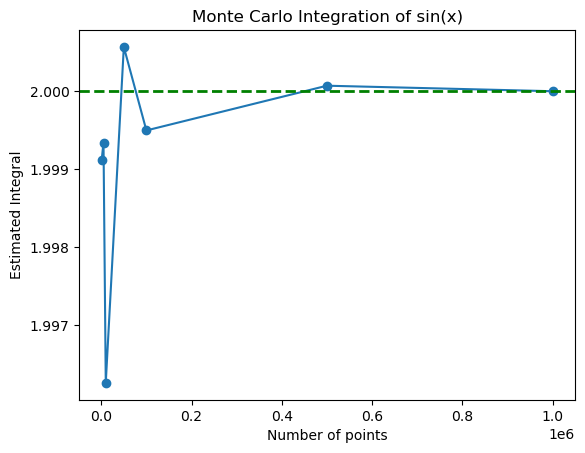

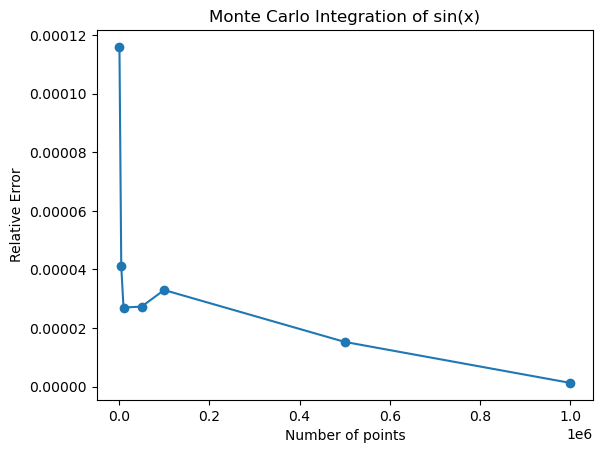

In [4]:
POINTS_NUMBERS = [1000, 5000, 10000, 50000, 100000, 500000, 1000000]
TRIES = 100
EXPECTED_INTEGRAL = 2

x = []
y1 = []
y2 = []
for n in POINTS_NUMBERS:
    integrate_values_sum = 0
    relative_errors_sum = 0
    for _ in range(TRIES):
        integrate_value = integrate(lambda x: math.sin(x), 0, math.pi, 1, n)
        relative_error = abs(integrate_value - EXPECTED_INTEGRAL) / EXPECTED_INTEGRAL

        integrate_values_sum += integrate_value
        relative_errors_sum += relative_error

    x.append(n)
    y1.append(integrate_values_sum / TRIES)
    y2.append(relative_error / TRIES)

plt.plot(x, y1, marker='o')
plt.axhline(y=2, color='g', linestyle='--', linewidth=2)
plt.title('Monte Carlo Integration of sin(x)')
plt.xlabel('Number of points')
plt.ylabel('Estimated Integral')
plt.show()

plt.plot(x, y2, marker='o')
plt.title('Monte Carlo Integration of sin(x)')
plt.xlabel('Number of points')
plt.ylabel('Relative Error')
plt.show()